# What type of weapons are typically used in mass shootings

In [2]:
#Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr, linregress

# Mass Killings Files
mass_kills_df = "./Resources/mass_killing_incidents_public.csv"
mass_weapons_df = "./Resources/mass_killing_weapons_public.csv"

# Load the data to a DataFrame
mass_kills = pd.read_csv(mass_kills_df)
mass_weapons = pd.read_csv(mass_weapons_df)

# Display the DataFrame
#mass_kills.head()
#mass_weapons.head()



In [3]:
#Merge Data
mass_kills_complete = pd.merge(mass_kills, mass_weapons, how="left", 
                               on=["incident_id", "incident_id"])
mass_kills_complete.head()

,incident_id,date,city,state,num_offenders,num_victims_killed,num_victims_injured,firstcod,secondcod,type,situation_type,location_type,location,longitude,latitude,narrative,weapon_id,weapon_type,gun_class,gun_type
0,568,2023-05-06,Allen,TX,1,8,7,Shooting,NaN,Public,Indiscriminate,Commercial/Retail/Entertainment,Commercial/Retail,-96.661856,33.130229,A gunman opened fire at the Allen Premium Outl...,883.0,gun,LG,semiautomatic rifle
1,568,2023-05-06,Allen,TX,1,8,7,Shooting,NaN,Public,Indiscriminate,Commercial/Retail/Entertainment,Commercial/Retail,-96.661856,33.130229,A gunman opened fire at the Allen Premium Outl...,884.0,gun,HG,handgun
2,567,2023-05-02,Lake Wales,FL,1,4,0,Shooting,NaN,Family,NaN,Residence/Other shelter,Residence,-81.584680,27.912660,"Al Stenson, 38, fatally shot his girlfriend an...",882.0,gun,UG,NaN
3,565,2023-04-30,Mojave,CA,1,4,0,Shooting,NaN,Unsolved,NaN,Residence/Other shelter,Residence,-118.177390,35.055360,Three women and one man were fatally shot late...,880.0,gun,UG,NaN
4,566,2023-04-30,Henryetta,OK,1,6,0,Shooting,NaN,Family,NaN,Residence/Other shelter,Residence,-95.936810,35.439920,"Jesse McFadden fatally shot his wife, her chil...",881.0,gun,HG,semiautomatic handgun


## Type of firearm used in mass shootings 

In [4]:
#Select Columns
weapons_info = mass_kills_complete[["incident_id", "date", "city", "state", 
                                   "num_victims_killed", "location_type", 
                                    "gun_type", "weapon_type"]]
#Rename
weapons_df = weapons_info.copy()

weapons_df.head()

,incident_id,date,city,state,num_victims_killed,location_type,gun_type,weapon_type
0,568,2023-05-06,Allen,TX,8,Commercial/Retail/Entertainment,semiautomatic rifle,gun
1,568,2023-05-06,Allen,TX,8,Commercial/Retail/Entertainment,handgun,gun
2,567,2023-05-02,Lake Wales,FL,4,Residence/Other shelter,NaN,gun
3,565,2023-04-30,Mojave,CA,4,Residence/Other shelter,NaN,gun
4,566,2023-04-30,Henryetta,OK,6,Residence/Other shelter,semiautomatic handgun,gun


In [5]:
#Rename the columns
weapons_df = weapons_df.rename(columns={
    "incident_id": "ID",
    "date": "Date",
    "city": "City",
    "state": "State",
    "num_victims_killed": "# of Victims",
    "location_type": "Location Type",
    "gun_type": "Gun Type",
    "weapon_type": "Weapon Type",
})

weapons_df.head()

,ID,Date,City,State,# of Victims,Location Type,Gun Type,Weapon Type
0,568,2023-05-06,Allen,TX,8,Commercial/Retail/Entertainment,semiautomatic rifle,gun
1,568,2023-05-06,Allen,TX,8,Commercial/Retail/Entertainment,handgun,gun
2,567,2023-05-02,Lake Wales,FL,4,Residence/Other shelter,NaN,gun
3,565,2023-04-30,Mojave,CA,4,Residence/Other shelter,NaN,gun
4,566,2023-04-30,Henryetta,OK,6,Residence/Other shelter,semiautomatic handgun,gun


In [6]:
#Cleaned DF

cleaned_weapons_df = weapons_df.dropna()


cleaned_weapons_df.head()

,ID,Date,City,State,# of Victims,Location Type,Gun Type,Weapon Type
0,568,2023-05-06,Allen,TX,8,Commercial/Retail/Entertainment,semiautomatic rifle,gun
1,568,2023-05-06,Allen,TX,8,Commercial/Retail/Entertainment,handgun,gun
4,566,2023-04-30,Henryetta,OK,6,Residence/Other shelter,semiautomatic handgun,gun
5,564,2023-04-28,Cleveland,TX,5,Residence/Other shelter,semiautomatic rifle,gun
7,562,2023-04-15,Dadeville,AL,4,Commercial/Retail/Entertainment,handgun,gun


## Most commonly used Weapon count

In [12]:
gun_type_count = cleaned_weapons_df["Gun Type"].value_counts()
gun_type_count

handgun                  135
semiautomatic handgun    120
semiautomatic rifle       62
rifle                     61
shotgun                   46
revolver                  34
pistol                    29
Name: Gun Type, dtype: int64

## Bar Chart for Weapons

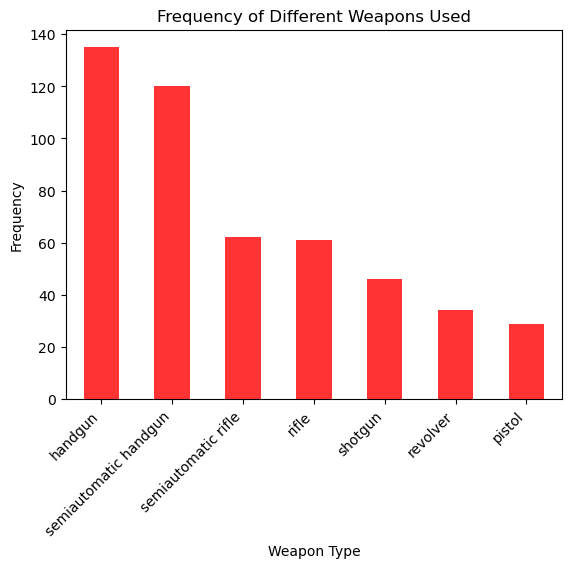

In [15]:
#Create a bar chart for the weapons used

#Frequency calculation
weapons_count = cleaned_weapons_df["Gun Type"].value_counts()

#Bar chart
weapons_count.plot(kind="bar", color="red", alpha=0.8)
plt.title("Frequency of Different Weapons Used")
plt.xticks(rotation=45, horizontalalignment="right")
plt.xlabel("Weapon Type") 
plt.ylabel("Frequency")

plt.show()


## Victims

In [17]:
mass_kills_complete.head()

,incident_id,date,city,state,num_offenders,num_victims_killed,num_victims_injured,firstcod,secondcod,type,situation_type,location_type,location,longitude,latitude,narrative,weapon_id,weapon_type,gun_class,gun_type
0,568,2023-05-06,Allen,TX,1,8,7,Shooting,NaN,Public,Indiscriminate,Commercial/Retail/Entertainment,Commercial/Retail,-96.661856,33.130229,A gunman opened fire at the Allen Premium Outl...,883.0,gun,LG,semiautomatic rifle
1,568,2023-05-06,Allen,TX,1,8,7,Shooting,NaN,Public,Indiscriminate,Commercial/Retail/Entertainment,Commercial/Retail,-96.661856,33.130229,A gunman opened fire at the Allen Premium Outl...,884.0,gun,HG,handgun
2,567,2023-05-02,Lake Wales,FL,1,4,0,Shooting,NaN,Family,NaN,Residence/Other shelter,Residence,-81.584680,27.912660,"Al Stenson, 38, fatally shot his girlfriend an...",882.0,gun,UG,NaN
3,565,2023-04-30,Mojave,CA,1,4,0,Shooting,NaN,Unsolved,NaN,Residence/Other shelter,Residence,-118.177390,35.055360,Three women and one man were fatally shot late...,880.0,gun,UG,NaN
4,566,2023-04-30,Henryetta,OK,1,6,0,Shooting,NaN,Family,NaN,Residence/Other shelter,Residence,-95.936810,35.439920,"Jesse McFadden fatally shot his wife, her chil...",881.0,gun,HG,semiautomatic handgun


In [18]:
#Create dataframe for victims
victims_info = mass_kills_complete[["incident_id", "date", "city", "state", 
                                   "num_victims_killed", "num_victims_injured", "location_type",
                                    "firstcod", "type"
                                    ]]
#Rename
victims_df = victims_info.copy()

victims_df.head()

,incident_id,date,city,state,num_victims_killed,num_victims_injured,location_type,firstcod,type
0,568,2023-05-06,Allen,TX,8,7,Commercial/Retail/Entertainment,Shooting,Public
1,568,2023-05-06,Allen,TX,8,7,Commercial/Retail/Entertainment,Shooting,Public
2,567,2023-05-02,Lake Wales,FL,4,0,Residence/Other shelter,Shooting,Family
3,565,2023-04-30,Mojave,CA,4,0,Residence/Other shelter,Shooting,Unsolved
4,566,2023-04-30,Henryetta,OK,6,0,Residence/Other shelter,Shooting,Family


In [19]:
#Rename the columns
victims_df = victims_df.rename(columns={
    "incident_id": "ID",
    "date": "Date",
    "city": "City",
    "state": "State",
    "num_victims_killed": "Deaths",
    "num_victims_injured": "Injuries",
    "location_type": "Location",
    "firstcod": "Cause of Death",
    "type": "Category"
})

victims_df.head()

,ID,Date,City,State,Deaths,Injuries,Location,Cause of Death,Category
0,568,2023-05-06,Allen,TX,8,7,Commercial/Retail/Entertainment,Shooting,Public
1,568,2023-05-06,Allen,TX,8,7,Commercial/Retail/Entertainment,Shooting,Public
2,567,2023-05-02,Lake Wales,FL,4,0,Residence/Other shelter,Shooting,Family
3,565,2023-04-30,Mojave,CA,4,0,Residence/Other shelter,Shooting,Unsolved
4,566,2023-04-30,Henryetta,OK,6,0,Residence/Other shelter,Shooting,Family


In [28]:
# city_death_count = victims_df[["City", "State", "Deaths", "Injuries"]].value_counts()
# city_death_count

City            State  Deaths  Injuries
Las Vegas       NV     60      867         24
San Bernardino  CA     14      24          16
Jersey City     NJ     4       3           10
Dekalb          IL     5       21           9
Nickel Mines    PA     5       5            7
                                           ..
Kennesaw        GA     4       1            1
Kansas City     MO     5       3            1
                       4       0            1
                KS     6       0            1
 Naples         FL     6       0            1
Length: 512, dtype: int64


In [29]:
city_death_count = victims_df.sort_values(by=["Deaths"], ascending=False)
city_death_count

,ID,Date,City,State,Deaths,Injuries,Location,Cause of Death,Category
282,342,2017-10-01,Las Vegas,NV,60,867,Open space,Shooting,Public
304,342,2017-10-01,Las Vegas,NV,60,867,Open space,Shooting,Public
283,342,2017-10-01,Las Vegas,NV,60,867,Open space,Shooting,Public
284,342,2017-10-01,Las Vegas,NV,60,867,Open space,Shooting,Public
285,342,2017-10-01,Las Vegas,NV,60,867,Open space,Shooting,Public
...,...,...,...,...,...,...,...,...,...
63,518,2022-08-04,Laurel,NE,4,0,Residence/Other shelter,Shooting,Suspected felony
414,282,2015-10-18,Tempe,AZ,4,0,Vehicle,Drowning,Family
413,569,2015-10-24,Stillwater,OK,4,46,Open space,Vehicle crash,Public
412,283,2015-11-01,Pendleton,SC,4,0,Residence/Other shelter,Shooting,Unsolved
